In [1]:
using MAT
using NPZ
using PyPlot
using Eirene
using DelimitedFiles

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-5197564848755555553\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-14489432766830809467\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-5197564848755555553\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [2]:
pol_vals = range(0.005, stop=0.025, length=11);
adh_vals = range(0.05, stop=0.25, length=11);

#### No proliferation, using individual as reference

In [3]:
adh_pol_sweep_folder = "adhesion_polarity_sweep";

posarray = readdlm(adh_pol_sweep_folder * "/2_adh_10_pol/Pos_200000.dat", ',', '\n');
posx = [];
posy = []
for j in 1:size(posarray)[2]
    complex_num = parse(Complex{Float64}, posarray[j])
    push!(posx, real(complex_num));
    push!(posy, imag(complex_num));
end
ref_positions = transpose(hcat(posx, posy));
ref_pers_diag = eirene(ref_positions, model="pc", maxdim=1);
ref_barcodedata = barcode(ref_pers_diag);

In [4]:
wasserstein_distances_ref1 = Array{Float64}(undef, 11, 11);
for adh = 1:11
    for pol = 1:11
        subfolder = string(adh) * "_adh_" * string(pol) * "_pol"
        pos_file_path = adh_pol_sweep_folder * "/" * subfolder * "/Pos_200000.dat"
        posarray = readdlm(pos_file_path, ',', '\n');
        posx = [];
        posy = []
        for j in 1:size(posarray)[2]
            complex_num = parse(Complex{Float64}, posarray[j])
            push!(posx, real(complex_num));
            push!(posy, imag(complex_num));    
        end
        positions = transpose(hcat(posx, posy));  
        pers_diag = eirene(positions, model="pc", maxdim=1);
        barcodedata = barcode(pers_diag);
        wasserstein_distances_ref1[adh, pol] = wasserstein_distance(ref_barcodedata, barcodedata, q=2, p=2)
    end
end

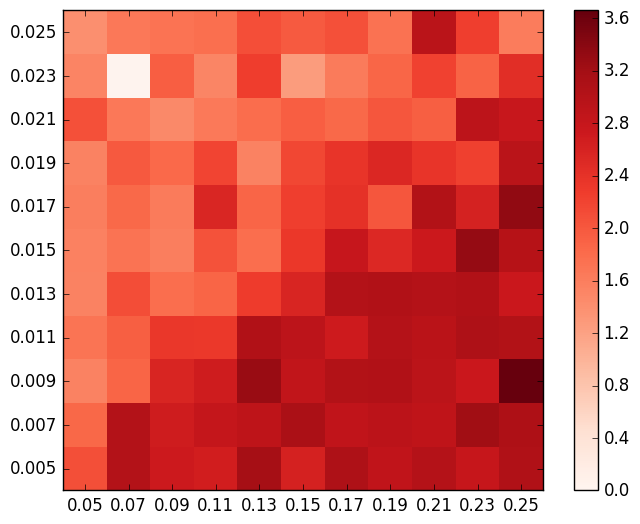

PyObject <matplotlib.colorbar.Colorbar object at 0x7f16c9a9a6d8>

In [5]:
figure(figsize=(8,6), dpi=300)
imshow(reverse(transpose(wasserstein_distances_ref1), dims=1), cmap="Reds", interpolation="none")
xticks(range(0, stop=10, length=11), [string(adh_val) for adh_val in adh_vals])
yticks(range(0, stop=10, length=11), reverse([string(pol_val) for pol_val in pol_vals]))
#axis("off")
colorbar()

In [6]:
npzwrite("adhesion_polarity_sweep_wass_heatmap_ref_1.npy", wasserstein_distances_ref1)

In [7]:
matwrite("adhesion_polarity_sweep_wass_heatmap_ref_1.mat", Dict("wass_mat" => wasserstein_distances_ref1));

#### No proliferation, using clustered as reference

In [8]:
adh_pol_sweep_folder = "adhesion_polarity_sweep";

posarray = readdlm(adh_pol_sweep_folder * "/10_adh_2_pol/Pos_200000.dat", ',', '\n');
posx = [];
posy = []
for j in 1:size(posarray)[2]
    complex_num = parse(Complex{Float64}, posarray[j])
    push!(posx, real(complex_num));
    push!(posy, imag(complex_num));
end
ref_positions = transpose(hcat(posx, posy));
ref_pers_diag = eirene(ref_positions, model="pc", maxdim=1);
ref_barcodedata = barcode(ref_pers_diag);

In [9]:
wasserstein_distances_ref2 = Array{Float64}(undef, 11, 11);
for adh = 1:11
    for pol = 1:11
        subfolder = string(adh) * "_adh_" * string(pol) * "_pol"
        pos_file_path = adh_pol_sweep_folder * "/" * subfolder * "/Pos_200000.dat"
        posarray = readdlm(pos_file_path, ',', '\n');
        posx = [];
        posy = []
        for j in 1:size(posarray)[2]
            complex_num = parse(Complex{Float64}, posarray[j])
            push!(posx, real(complex_num));
            push!(posy, imag(complex_num));    
        end
        positions = transpose(hcat(posx, posy));  
        pers_diag = eirene(positions, model="pc", maxdim=1);
        barcodedata = barcode(pers_diag);
        wasserstein_distances_ref2[adh, pol] = wasserstein_distance(ref_barcodedata, barcodedata, q=2, p=2)
    end
end

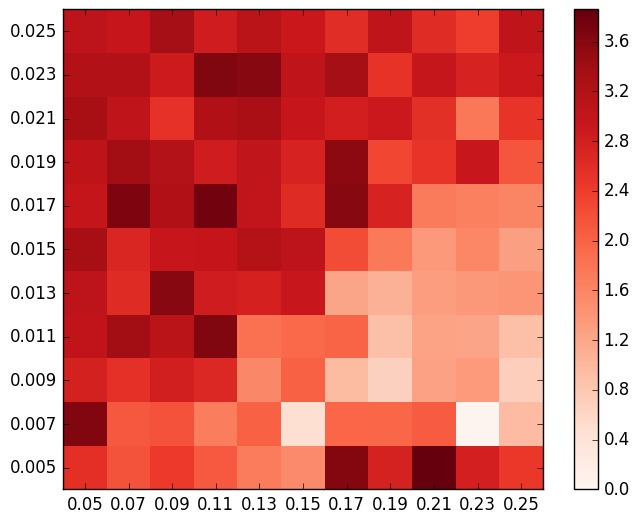

PyObject <matplotlib.colorbar.Colorbar object at 0x7f16c0e9abe0>

In [10]:
figure(figsize=(8,6), dpi=300)
imshow(reverse(transpose(wasserstein_distances_ref2), dims=1), cmap="Reds", interpolation="none")
xticks(range(0, stop=10, length=11), [string(adh_val) for adh_val in adh_vals])
yticks(range(0, stop=10, length=11), reverse([string(pol_val) for pol_val in pol_vals]))
#axis("off")
colorbar()

In [11]:
npzwrite("adhesion_polarity_sweep_wass_heatmap_ref_2.npy", wasserstein_distances_ref2)

In [12]:
matwrite("adhesion_polarity_sweep_wass_heatmap_ref_2.mat", Dict("wass_mat" => wasserstein_distances_ref2));

#### With proliferation, using spanning as reference

In [13]:
adh_pol_sweep_folder = "adhesion_polarity_proliferation_sweep";

posarray = readdlm(adh_pol_sweep_folder * "/2_adh_10_pol/Pos_200000.dat", ',', '\n');
posx = [];
posy = []
for j in 1:size(posarray)[2]
    complex_num = parse(Complex{Float64}, posarray[j])
    push!(posx, real(complex_num));
    push!(posy, imag(complex_num));
end
ref_positions = transpose(hcat(posx, posy));
ref_pers_diag = eirene(ref_positions, model="pc", maxdim=1);
ref_barcodedata = barcode(ref_pers_diag);

In [14]:
wasserstein_distances_prolif_ref1 = Array{Float64}(undef, 11, 11);
for adh = 1:11
    for pol = 1:11
        subfolder = string(adh) * "_adh_" * string(pol) * "_pol"
        pos_file_path = adh_pol_sweep_folder * "/" * subfolder * "/Pos_200000.dat"
        posarray = readdlm(pos_file_path, ',', '\n');
        posx = [];
        posy = []
        for j in 1:size(posarray)[2]
            complex_num = parse(Complex{Float64}, posarray[j])
            push!(posx, real(complex_num));
            push!(posy, imag(complex_num));    
        end
        positions = transpose(hcat(posx, posy));  
        pers_diag = eirene(positions, model="pc", maxdim=1);
        barcodedata = barcode(pers_diag);
        wasserstein_distances_prolif_ref1[adh, pol] = wasserstein_distance(ref_barcodedata, barcodedata, q=2, p=2)
    end
end

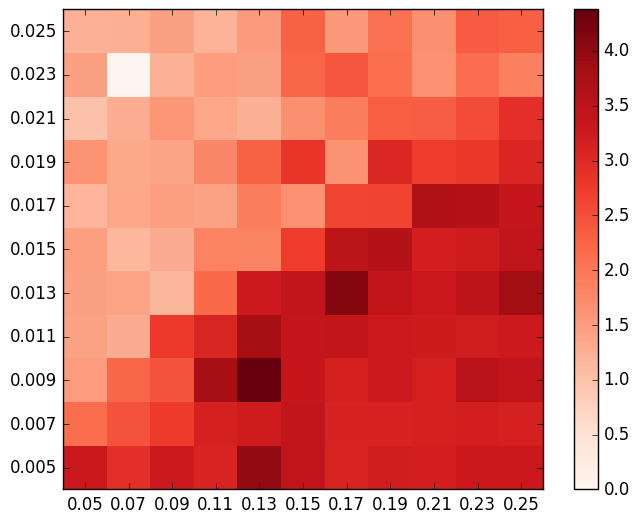

PyObject <matplotlib.colorbar.Colorbar object at 0x7f16bcde3978>

In [15]:
figure(figsize=(8,6), dpi=300)
imshow(reverse(transpose(wasserstein_distances_prolif_ref1), dims=1), cmap="Reds", interpolation="none")
xticks(range(0, stop=10, length=11), [string(adh_val) for adh_val in adh_vals])
yticks(range(0, stop=10, length=11), reverse([string(pol_val) for pol_val in pol_vals]))
#axis("off")
colorbar()

In [16]:
npzwrite("adhesion_polarity_proliferation_sweep_wass_heatmap_ref_1.npy", wasserstein_distances_prolif_ref1)

In [17]:
matwrite("adhesion_polarity_proliferation_sweep_wass_heatmap_ref_1.mat", 
    Dict("wass_mat" => wasserstein_distances_prolif_ref1));

#### With proliferation, using clustered as reference

In [18]:
adh_pol_sweep_folder = "adhesion_polarity_proliferation_sweep";

posarray = readdlm(adh_pol_sweep_folder * "/10_adh_2_pol/Pos_200000.dat", ',', '\n');
posx = [];
posy = []
for j in 1:size(posarray)[2]
    complex_num = parse(Complex{Float64}, posarray[j])
    push!(posx, real(complex_num));
    push!(posy, imag(complex_num));
end
ref_positions = transpose(hcat(posx, posy));
ref_pers_diag = eirene(ref_positions, model="pc", maxdim=1);
ref_barcodedata = barcode(ref_pers_diag);

In [19]:
wasserstein_distances_prolif_ref2 = Array{Float64}(undef, 11, 11);
for adh = 1:11
    for pol = 1:11
        subfolder = string(adh) * "_adh_" * string(pol) * "_pol"
        pos_file_path = adh_pol_sweep_folder * "/" * subfolder * "/Pos_200000.dat"
        posarray = readdlm(pos_file_path, ',', '\n');
        posx = [];
        posy = []
        for j in 1:size(posarray)[2]
            complex_num = parse(Complex{Float64}, posarray[j])
            push!(posx, real(complex_num));
            push!(posy, imag(complex_num));    
        end
        positions = transpose(hcat(posx, posy));  
        pers_diag = eirene(positions, model="pc", maxdim=1);
        barcodedata = barcode(pers_diag);
        wasserstein_distances_prolif_ref2[adh, pol] = wasserstein_distance(ref_barcodedata, barcodedata, q=2, p=2)
    end
end

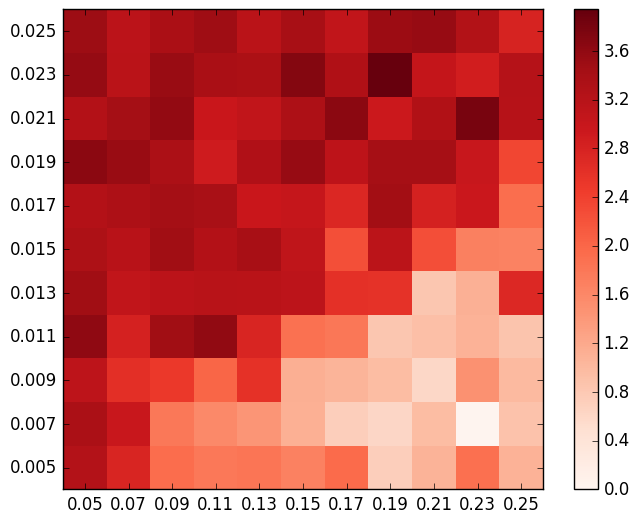

PyObject <matplotlib.colorbar.Colorbar object at 0x7f16bcd2e8d0>

In [20]:
figure(figsize=(8,6), dpi=300)
imshow(reverse(transpose(wasserstein_distances_prolif_ref2), dims=1), cmap="Reds", interpolation="none")
xticks(range(0, stop=10, length=11), [string(adh_val) for adh_val in adh_vals])
yticks(range(0, stop=10, length=11), reverse([string(pol_val) for pol_val in pol_vals]))
#axis("off")
colorbar()

In [21]:
npzwrite("adhesion_polarity_proliferation_sweep_wass_heatmap_ref_2.npy", wasserstein_distances_prolif_ref2)

In [22]:
matwrite("adhesion_polarity_proliferation_sweep_wass_heatmap_ref_2.mat", 
    Dict("wass_mat" => wasserstein_distances_prolif_ref2));

#### Compute Wasserstein distance between all pairs of simulations (w/o proliferation)

In [ ]:
adh_pol_sweep_folder = "adhesion_polarity_sweep";

wasserstein_distances = Array{Float64}(undef, 11*11, 11*11);
p = 0;
for adh_1 = 1:11
    for pol_1 = 1:11
        
        subfolder = string(adh_1) * "_adh_" * string(pol_1) * "_pol"
        pos_file_path = adh_pol_sweep_folder * "/" * subfolder * "/Pos_200000.dat"
        posarray = readdlm(pos_file_path, ',', '\n');
        posx = [];
        posy = []
        for j in 1:size(posarray)[2]
            complex_num = parse(Complex{Float64}, posarray[j])
            push!(posx, real(complex_num));
            push!(posy, imag(complex_num));    
        end
        positions_1 = transpose(hcat(posx, posy));
        pers_diag_1 = eirene(positions_1, model="pc", maxdim=1);
        barcodedata_1 = barcode(pers_diag_1);
        p = p + 1;
        
        #print(string(p)*"\n");
        
        q = 0;
        for adh_2 = 1:11
            for pol_2 = 1:11
                
                subfolder = string(adh_2) * "_adh_" * string(pol_2) * "_pol"
                pos_file_path = adh_pol_sweep_folder * "/" * subfolder * "/Pos_200000.dat"
                posarray = readdlm(pos_file_path, ',', '\n');
                posx = [];
                posy = []
                for j in 1:size(posarray)[2]
                    complex_num = parse(Complex{Float64}, posarray[j])
                    push!(posx, real(complex_num));
                    push!(posy, imag(complex_num));    
                end
                positions_2 = transpose(hcat(posx, posy));  
                pers_diag_2 = eirene(positions_2, model="pc", maxdim=1);
                barcodedata_2 = barcode(pers_diag_2);
                q = q + 1;
                wasserstein_distances[p, q] = wasserstein_distance(barcodedata_1, barcodedata_2, q=2, p=2)
            end
        end
        
    end
end

In [4]:
npzwrite("adhesion_polarity_sweep_allpairs_fixed.npy", wasserstein_distances)

In [5]:
matwrite("adhesion_polarity_sweep_allpairs_fixed.mat", Dict("wass_mat" => wasserstein_distances));

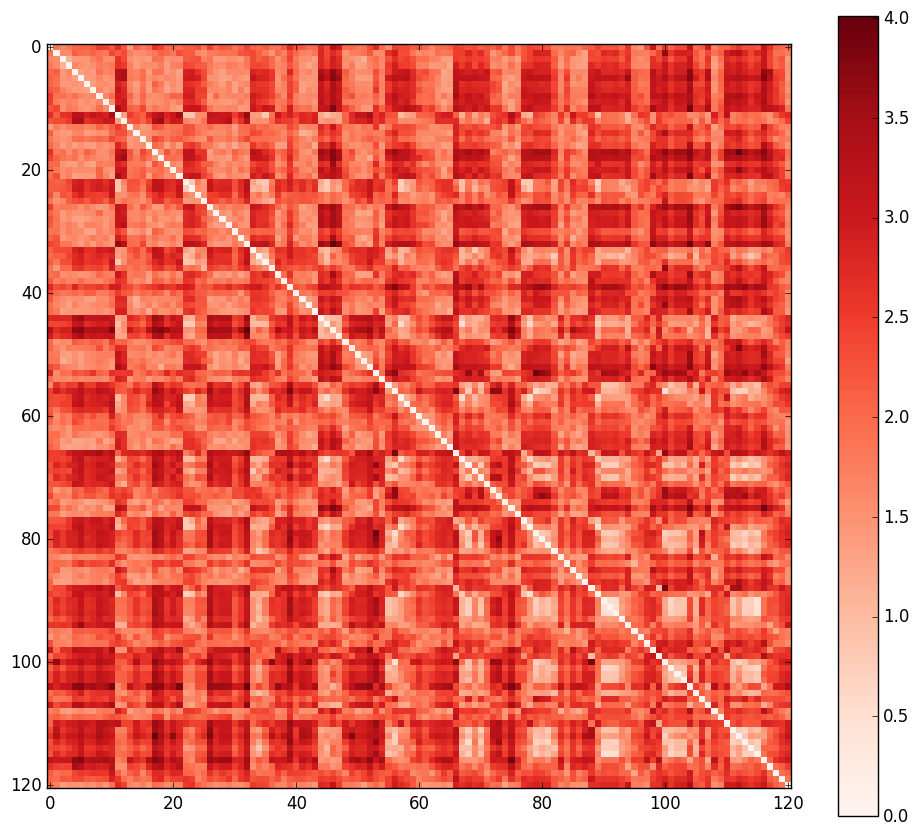

PyObject <matplotlib.colorbar.Colorbar object at 0x7f2e8defa978>

In [8]:
figure(figsize=(12,10), dpi=300)
imshow(wasserstein_distances, cmap="Reds", interpolation="none")
colorbar()

#### Compute Wasserstein distance between all pairs of simulations (w/ proliferation)

In [ ]:
adh_pol_sweep_folder = "adhesion_polarity_proliferation_sweep";

wasserstein_distances_prof = Array{Float64}(undef, 11*11, 11*11);
p = 0;
for adh_1 = 1:11
    for pol_1 = 1:11
        
        subfolder = string(adh_1) * "_adh_" * string(pol_1) * "_pol"
        pos_file_path = adh_pol_sweep_folder * "/" * subfolder * "/Pos_200000.dat"
        posarray = readdlm(pos_file_path, ',', '\n');
        posx = [];
        posy = []
        for j in 1:size(posarray)[2]
            complex_num = parse(Complex{Float64}, posarray[j])
            push!(posx, real(complex_num));
            push!(posy, imag(complex_num));    
        end
        positions_1 = transpose(hcat(posx, posy));
        pers_diag_1 = eirene(positions_1, model="pc", maxdim=1);
        barcodedata_1 = barcode(pers_diag_1);
        p = p + 1;
        
        #print(string(p)*"\n");
        
        q = 0;
        for adh_2 = 1:11
            for pol_2 = 1:11
                
                subfolder = string(adh_2) * "_adh_" * string(pol_2) * "_pol"
                pos_file_path = adh_pol_sweep_folder * "/" * subfolder * "/Pos_200000.dat"
                posarray = readdlm(pos_file_path, ',', '\n');
                posx = [];
                posy = []
                for j in 1:size(posarray)[2]
                    complex_num = parse(Complex{Float64}, posarray[j])
                    push!(posx, real(complex_num));
                    push!(posy, imag(complex_num));    
                end
                positions_2 = transpose(hcat(posx, posy));  
                pers_diag_2 = eirene(positions_2, model="pc", maxdim=1);
                barcodedata_2 = barcode(pers_diag_2);
                q = q + 1;
                wasserstein_distances_prof[p, q] = wasserstein_distance(barcodedata_1, barcodedata_2, q=2, p=2)
            end
        end
        
    end
end

In [4]:
npzwrite("adhesion_polarity_sweep_allpairs.npy", wasserstein_distances_prof)

In [5]:
matwrite("adhesion_polarity_sweep_allpairs.mat", Dict("wass_mat" => wasserstein_distances_prof));

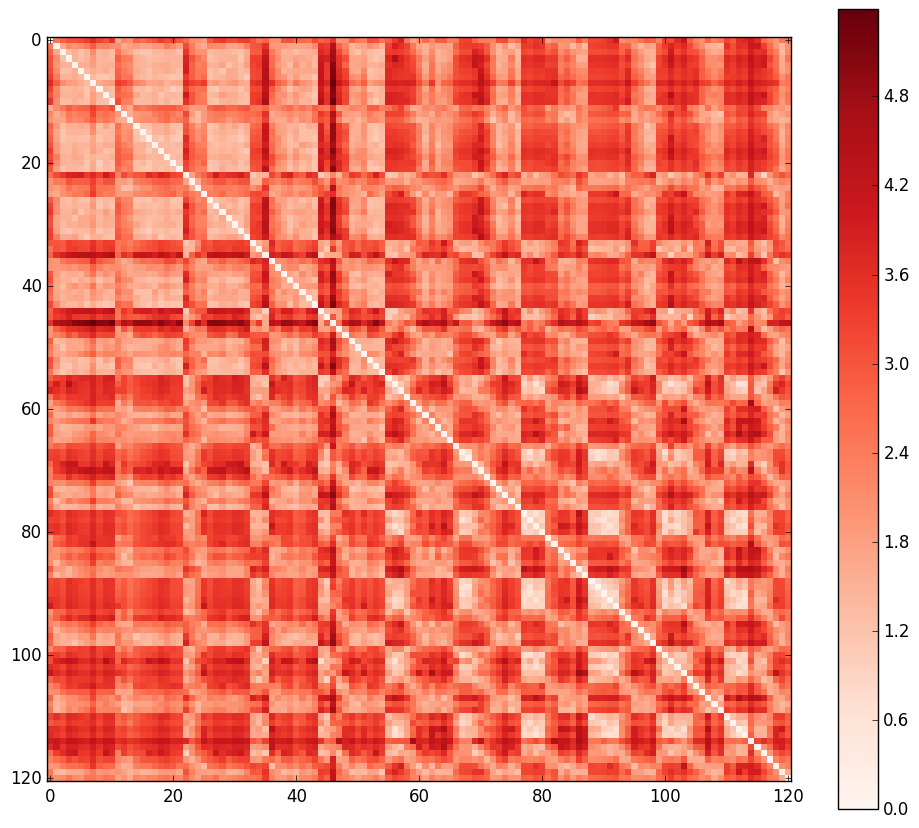

PyObject <matplotlib.colorbar.Colorbar object at 0x7f4a00d28438>

In [6]:
figure(figsize=(12,10), dpi=300)
imshow(wasserstein_distances_prof, cmap="Reds", interpolation="none")
colorbar()